In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.pylab import *
from PIL import Image
from IPython.display import HTML

In [3]:
### Edge detection. Give an edge point contour. 
def detect(image_name, level=[200]):
    fig, ax = plt.subplots(1, 1)
    # read image to array, then get image border with contour
    im = array(Image.open(image_name).convert('L'))
    contour_plot = ax.contour(im, levels=level, colors='black', origin='image')
    plt.close()
    # get contour path
    contour_path = contour_plot.collections[0].get_paths()[0] # It has to be a polygon.
    x_table, y_table = contour_path.vertices[:, 0], contour_path.vertices[:, 1]
    # center the image
    x_table = x_table - min(x_table)
    y_table = y_table - min(y_table)
    x_table = x_table - max(x_table) / 2
    y_table = y_table - max(y_table) / 2
    return x_table, y_table # return the coordinates of the edge points

### Discrete Fourier Series
def DTFS(z, k):
    N = len(z)
    ak = 0+0j
    for n in range(N):
        ak += z[n] * (np.cos(-2*np.pi/N*n*k) + 1j*np.sin(-2*np.pi/N*n*k))
    ak = ak/N
    return ak

### Achieve the coordinates of the edge points of the image.
def extractSignalFromImg(filename):
    x_table, y_table = detect(filename)
    y_table = y_table.tolist()
    x_table = x_table.tolist()
    count = 0
    sparse_y = []
    sparse_x = []
    for t in y_table:
        if count % 5 == 0 : # we do not need too much points
            sparse_y.append(t)
        count += 1    
    count = 0
    for t in x_table:
        if count % 5 == 0 : # we do not need too much points
            sparse_x.append(t)
        count += 1
    x = np.array(sparse_x)
    y = np.array(sparse_y)
    return x, y

# Draw the animation.
def draw(x, y, m):
    fig, ax = plt.subplots(1,1)
    plt.axis('equal')
    z = x + 1j*y # consider the coordinates of edge points as complex signal
    cn = [] # Fourier series
    for k in range(-m, m+1):
        cn.append(DTFS(z,k))
    T = np.linspace(0, 2*np.pi, 500)
    px = []
    py = []
    for t in T:
        p = 0+0j
        for j in range(2*m+1):
            p += cn[j] * ( np.cos((j-m)*t) + 1j*np.sin((j-m)*t) )
        px.append(p.real)
        py.append(p.imag)

    ax.plot(x, y, linewidth=2, color='black') # original outline
    ax.plot(px, py, linewidth=2, color='blue') # the simulated path
    # Calculate related circles of each Fourier series
    n = np.linspace(-m,m,2*m+1)
    cn = np.array(cn)
    r = abs(cn)
    p = np.angle(cn)
    w = 2 * np.pi * n / len(z)

    circles = []
    dots = []
    for i in range(len(n)):
        circle, = ax.plot([], [], linewidth=1, color='grey') # circle
        if i == len(n)-1:
            dot, = ax.plot([], [], 'o', color='red') # the end
        else:
            dot, = ax.plot([], [], 'o', color='grey') # circle center
        circles.append(circle)
        dots.append(dot)

    theta = np.linspace(0, 2*np.pi, 100) # The root will rotated a circle.
    def Anim(t):
        center = [0,0]
        for i in range(len(n)):
            circles[i].set_data(center[0]+r[i]*np.cos(theta), center[1]+r[i]*np.sin(theta))
            center = [center[0] + r[i]*np.cos(p[i]+w[i]*t), center[1]+r[i]*np.sin(p[i]+w[i]*t)]
            dots[i].set_data([center[0],center[1]])
    return animation.FuncAnimation(fig, Anim, frames=len(z), interval=25)

##############################################################################
# Please do not modify the codes above, unless you know what you are doing!!!#
##############################################################################

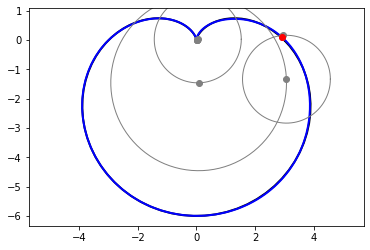

In [7]:
######################################################
# Download a monochrome pattern and upload it.       #
# Then, we can let the epicycles to draw its outline.#
######################################################
filename = 'img/test.png' 
# x, y = extractSignalFromImg(filename)


#################################################################
# You can also define a curve by providing a parameter equation.#
#################################################################
theta = np.linspace(0,2*np.pi, 100)
x = 3 * (1-np.sin(theta)) * np.cos(theta)
y = 3 * (1-np.sin(theta)) * np.sin(theta)

###########################################
# The amount of epicycles you want to use.#
###########################################
m = 5 # Num of Terms 2*m + 1; the index is from -m to m
anim = draw(x, y, m)
HTML(anim.to_html5_video())